In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler


data_classification = pd.read_csv('heart.csv')

print(data_classification.head())

data_classification.isnull().sum()


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140        289.0          0     Normal  172.0   
1   49   F           NAP        160        180.0          0     Normal  156.0   
2   37   M           ATA        130        283.0          0         ST   98.0   
3   48   F           ASY        138        214.0          0     Normal  108.0   
4   54   M           NAP        150          NaN          0     Normal  122.0   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             2
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### split data into dependent and independent variables

In [28]:
X_classification = data_classification[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y_classification = data_classification['HeartDisease']

#### Impute a categorical and numerical missing value and Convert a categorical variable to number 

In [29]:

X_classification = pd.get_dummies(X_classification, columns=['RestingECG','ExerciseAngina', 'ST_Slope', 'Sex'], drop_first=True)

chest_pain_dummies = pd.get_dummies(X_classification['ChestPainType'], prefix='ChestPain')
X_classification = pd.concat([X_classification, chest_pain_dummies], axis=1)
X_classification.drop('ChestPainType', axis=1, inplace=True)


X_classification.fillna(X_classification.mean(), inplace=True)

###  Splitting the dataset into a Training set and a Test set

In [30]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


Text(0, 0.5, 'MaxHR')

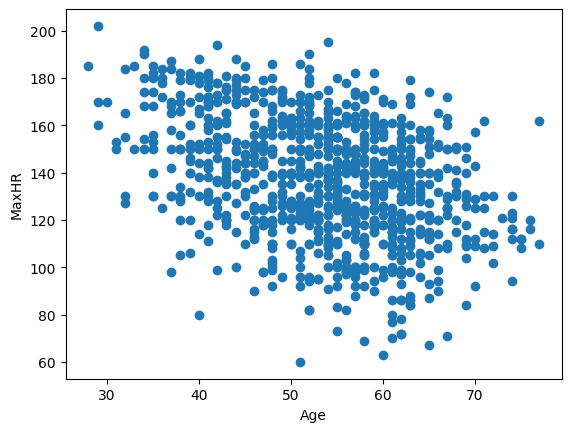

In [31]:
fig = plt.scatter(data_classification.Age, data_classification.MaxHR)
plt.xlabel('Age')
plt.ylabel('MaxHR')

## Apply 2 methods of scaling to treat outliers

##### Robust Scaling: It scales the data using the median and IQR. The formula for robust scaling is (X - Q2) / (Q3 - Q1), where X is the data point, Q2 is the median, Q1 is the first quartile, and Q3 is the third quartile.
##### Standard Scaling: It scales the data using the mean and standard deviation. The formula for standard scaling is (X - mean) / standard deviation

In [32]:
robust_scaler = RobustScaler()
X_classification_scaled_robust = robust_scaler.fit_transform(X_classification)

standard_scaler = StandardScaler()
X_classification_scaled_standard = standard_scaler.fit_transform(X_classification)


## Fit a classification model

In [33]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_classification, y_train_classification)

KNeighborsClassifier()

###  Discuss confusion matrix and Discuss accuracy metric

In [34]:
y_pred_classification = knn_model.predict(X_test_classification)

conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
accuracy = accuracy_score(y_test_classification, y_pred_classification)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')

Confusion Matrix:
[[55 22]
 [32 75]]
Accuracy: 0.7065217391304348


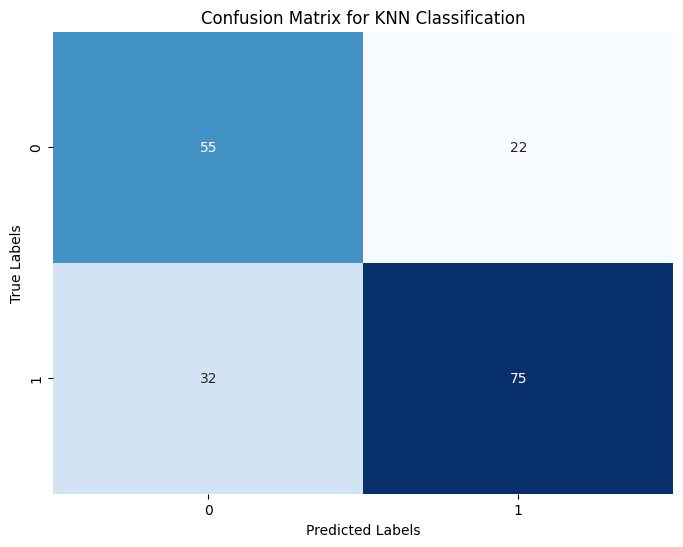

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classification')
plt.show()